# Hypothesis Testing and Statistical Significance


Lesson Goals

In this lesson we will learn the fundamentals of hypothesis testing and statistical significance.
Introduction

Many times in the real world we would like to resolve a question that requires a comparison of two quantities. For example, does leaving the light on cause people to take longer to fall asleep, or do books with more pages sell more copies. Using a few basic assumptions, we can use statistical inference to come to a conclusion and determine an answer for these questions. Hypothesis allow us to compare two samples and using certain assumptions we can either reject or not reject our hypothesis (as true statisticians we never say that we accept a hypothesis only reject or do not reject).
Key Concepts
Population

The population includes all elements in a dataset. For example, the population of all students of a certain university includes all students enrolled at that university.
Sample

A sample is a subset of the population. For example, a sample of university students from a certain university can be a randomly selected group of students that are enrolled in the university.
Null Hypothesis

A null hypothesis is what we consider the current status quo. We are trying to disprove this null hypothesis. For example, a null hypothesis might be that all students enrolled in a university have a similar grade point average. We denote the null hypothesis H0.

The typical notation for a null hypothesis would be: H0: μ > 85

Where Ој is the mean and our initial assumption is that it is less than or equal to 85.
Alternative Hypothesis

An alternative hypothesis is a rival hypothesis to the null hypothesis. We compare this hypothesis with the null hypothesis to decide whether or not we reject the null hypothesis.

We denote the alternative hypothesis with H1 or Ha.

The typical notation for an alternative hypothesis is H1: μ > 85.

We would like to prove that Ој is in fact less than 85.
Types of Hypotheses

There are 3 types of hypotheses:

    H0: μ ≤ k

    H1: μ > k

    H0: μ ≥ k

    H1: μ < k

    H0: μ = k

    H1: μ ≠ k

The first two types are one-sided hypothesis tests while the third is two-sided. A one-sided hypothesis test only looks at whether the test statistic has a very large positive value or a very large negative value. A two-sided test looks at both. In the two-sided case, we will reject the null hypothesis in the case that the test statistic is either a very large positive value or a very large negative value.
Test Assumptions

In order to conduct a hypothesis test we need to meet certain assumptions:

    Our observations must be independent of each other. For example, if we have people who live in the same household participating in a medical trial, they might be exposed to the same environmental conditions or eat the same food. This can bias our results.

    Normality of data - We assume that the sample is derived from a normally distributed data.

    Adequate sample size. In order to perform a test using the normal distribution and not approximate to the t distribution, our sample size must be greater than 30.

    In order to use the normal distribution for our hypothesis test, we must assume the population standard deviation is known. If the population standard deviation is not known, then we use the t-distribution for the hypothesis test.

Test Statistic

Once we determine the type of hypothesis test and that our assumptions have been met, we use our data to decide whether to reject or not reject the null hypothesis.

0.049787068367863944
0.6321205588285577
1.0034717832360585


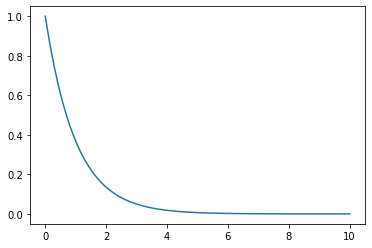

In [24]:
from scipy.stats import expon
exp = expon(1) 
print(exp.pdf(4))
print(exp.cdf(2))       
print(exp.rvs()) 
x = np.linspace(0,10,100)
y = expon.pdf(x)
fig, ax = plt.subplots(1, 1)
ax.plot(x,y)

This means that our test statistic is equal to the difference between the sample mean and our constant divided by the standard deviation over the square root of the sample size.

We compare the z or t value found in the test with the boundary that we determine for the test using the significance that we chose for the test and determine the result of our test.


# Test significance

Typically when we perform a hypothesis test, we cannot be 100% sure of the result. However, we can determine the percent of certainty in our result. For 95% confidence we look at a 5% significance in our test.

Having 95% confidence means that we start off with the null hypothesis as the status quo. We compute our test statistic given that we think the null hypothesis is true. The significance that we produce from the test statistic is the probability that we obtained our result due to random chance. If there is less than a 5% chance that we obtained our result due to random chance, then that is a very small probability of this outcome being random and it is most likely happening due to something in the experiment. Then we can reject the null hypothesis.


# Confidence Intervals

Using the critical value that we have computed for our test statistic, we can construct a confidence interval. We compute the confidence interval for a 2 sided test:

What do confidence intervals mean?

For a 95% confidence interval it means that if we take our population and sample it 100 times, 95 times out of those hundred times, we will produce a confidence interval that contains the true mean of the population (remember that we don't know the true mean of the population, we are estimating it using the sample). If a large portion of our confidence intervals do not contain what our hypothesis claims to be the mean, then we can reject the null hypothesis.
Performing a Hypothesis Test

Exploring a more concrete example will help tie these concepts together. A pharmaceutical company is trying out a medication for lowering blood sugar and managing diabetes. It is known that any level of Hemoglobin A1c below 5.7% is considered normal. The drug company has treated 100 study volunteers with this medication and would like to prove that after treatment their mean A1c is below 5.7%.

Our hypothesis will be:

    H0: μ ≥ 5.7

    H1: μ < 5.7

The pharmaceutical company reports a mean A1c of 5.1% with a sample standard deviation of 1.6.

We would like to use our sample to make inference regarding the population. If we reject the null hypothesis, this could provide us with some evidence that the average levels of A1c are within the normal range.

In order to perform a hypothesis test, first we check our assumptions. We do not know anything about the population standard deviation, so even though the sample size is large enough, we will use the t test. We can assume that the pharmaceutical company used proper practices when selecting their study subjects in such a way to avoid dependence and that they are also aware that the data is derived from a normally distributed population.

Since we have 100 subjects, we use 99 degrees of freedom to compute the test statistic. The test statistic for 99 degrees of freedom translates to a p-value of less than 0.0005. This is smaller than 0.05 and therefore we reject the null hypothesis. This is great news for our patients!



# Hypothesis Tests in Python

We can use the Scipy library to perform hypothesis tests. The Scipy library has a function for one sample hypothesis tests called ttest_1samp. This test takes a dataset and a constant for comparison and returns the test statistic and the p value for a 2 sided test.

Our test is a one-sided test so we will only look at the test statistic. In order to use the p-value we have to divide the p-value by 2.



In [1]:
import numpy as np
from scipy.stats import ttest_1samp
patients = np.random.normal(5.1, 1.6, 100)
ttest_1samp(patients, 5.7)

Ttest_1sampResult(statistic=-2.124917532126503, pvalue=0.03608308764211481)

In this example, we generated random data with mean 5.1 and standard deviation 1.6 in order to simulate our patients. Our test statistic is close but not exactly the same since the mean of the sample is not exactly 5.1 like in the example but in fact:



In [2]:
np.mean(patients)

5.379469677682324

This explains the small discrepancy in the test statistic. However, the result is the same - we reject the null hypothesis.